In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dark_horse = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

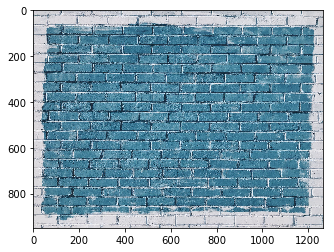

In [3]:
plt.imshow(show_bricks)

# Calculate Histogram Values

In [4]:
# open cv channel
'''
Blue = channels[0]
Green = channels[1]
Red = channels[2]
'''
hist_values = cv2.calcHist([blue_bricks],channels=[2],mask=None,histSize=[256],ranges=[0,256])

In [5]:
hist_values.shape

(256, 1)

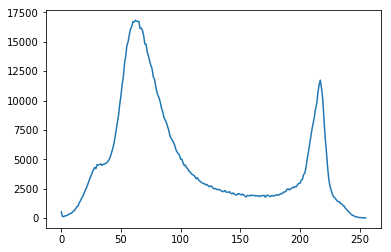

In [6]:
plt.plot(hist_values)

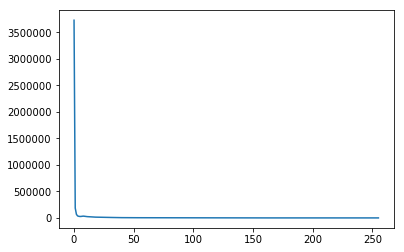

In [7]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

# Plot for all 3 channels

In [8]:
img = blue_bricks

Text(0.5,1,'Histogram for blue bricks')

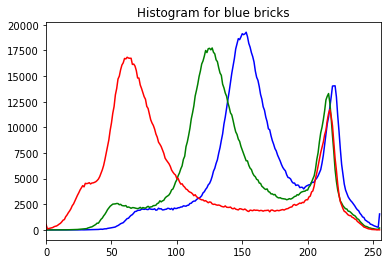

In [9]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],mask=None,histSize=[256],ranges=[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

plt.title('Histogram for blue bricks')

In [10]:
img1 = dark_horse

Text(0.5,1,'Histogram for Dark Horse')

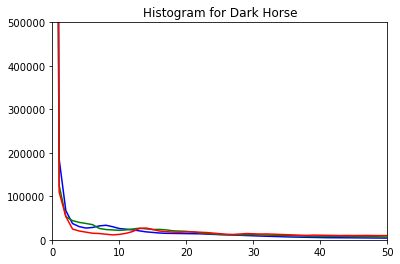

In [11]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],mask=None,histSize=[256],ranges=[0,256])
    plt.plot(histr,col)
    plt.xlim([0,50])
    plt.ylim([0,500000])

plt.title('Histogram for Dark Horse')

In [12]:
img2 = rainbow

Text(0.5,1,'Histogram for rainbow')

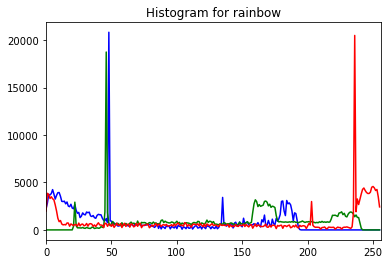

In [13]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img2],[i],mask=None,histSize=[256],ranges=[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

plt.title('Histogram for rainbow')

# Histogram for Masked section of Image & Histogram Equalization

## **Histogram Equalization** : Method of Contrast adjustment based on the image's histogram (this also means you can reduce the color depth)

### what is the meaning of making a image contrast : this is making the cumulative histogram as linear as possible

In [14]:
img2.shape

(550, 413, 3)

In [15]:
# Let us create a mask
mask = np.zeros(shape=(550,413),dtype=np.uint8)

In [16]:
mask.shape

(550, 413)

In [17]:
#plt.imshow(mask,cmap='gray')
# this is mask(y,x)
mask[300:400,100:400] = 255

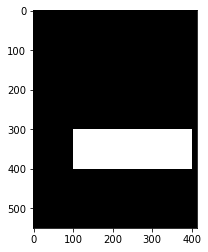

In [18]:
plt.imshow(mask,cmap='gray')

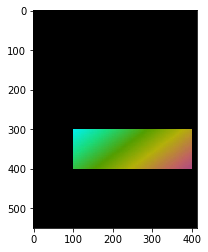

In [20]:
#plt.imshow(show_rainbow)
maksed_img = cv2.bitwise_and(img2,img2,mask=mask)
plt.imshow(maksed_img)

In [21]:
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

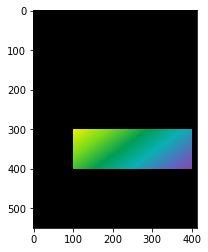

In [22]:
plt.imshow(show_masked_img)

In [23]:
hist_mask = cv2.calcHist([rainbow],[2],mask=mask,histSize=[256],ranges=[0,256])

In [24]:
hist_without_mask = cv2.calcHist([rainbow],[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5,1,'RED HISTOGRAM FOR MASKED RED')

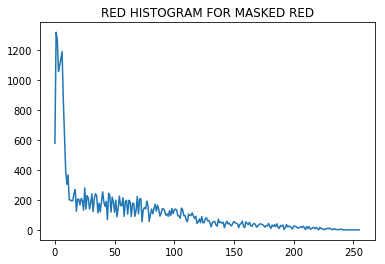

In [25]:
plt.plot(hist_mask)
plt.title('RED HISTOGRAM FOR MASKED RED')

Text(0.5,1,'RED HISTOGRAM FOR No MASKED RED')

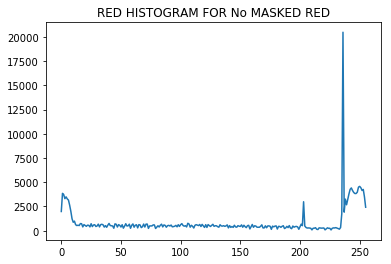

In [26]:
plt.plot(hist_without_mask)
plt.title('RED HISTOGRAM FOR No MASKED RED')

# Histogram Equalization

In [27]:
gorilla = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/gorilla.jpg',0)
#show_gorilla = cv2.cvtColor(gorilla,cv2.COLOR_BGR2RGB)

In [28]:
def display_img(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

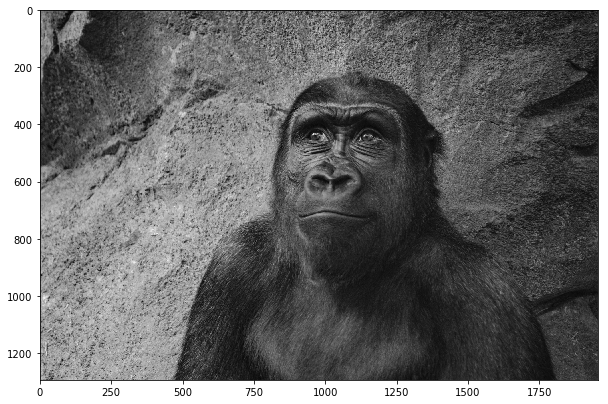

In [29]:
display_img(gorilla)

In [30]:
gorilla.shape

(1295, 1955)

# Steps to do now:
#### 1. Calculate the histogram
#### 2. Equalize the histogram
#### 3. visualize it
#### 4. See the difference between them

In [31]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

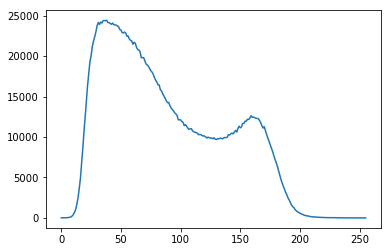

In [32]:
plt.plot(hist_values)

In [33]:
eq_gorilla = cv2.equalizeHist(gorilla)

In [34]:
eq_gorilla = cv2.equalizeHist(gorilla)

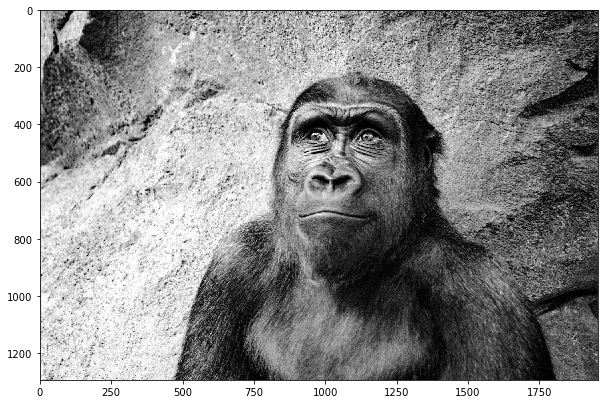

In [35]:
display_img(eq_gorilla)

In [36]:
hist_eq = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

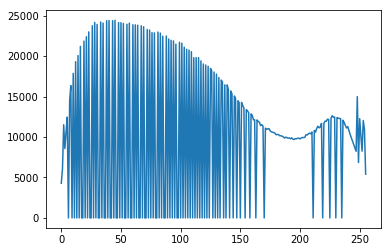

In [37]:
plt.plot(hist_eq)

In [38]:
color_gorilla = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/gorilla.jpg')

In [39]:
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)

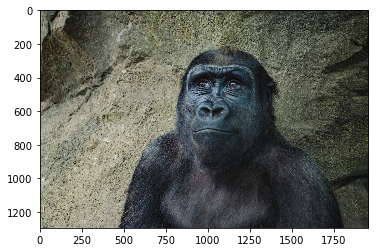

In [40]:
plt.imshow(show_gorilla)

# If we want to equalise the histogram of the color image (increase the contrast)
#### 1. first convert it to HSV

In [41]:
hsv_img = cv2.cvtColor(show_gorilla,cv2.COLOR_RGB2HSV)

In [42]:
# This is how we write the value channel : hsv[:,:,2]
#hsv_img[:,:,0] :Hue channel
#hsv_img[:,:,1] :Saturation channel
#hsv_img[:,:,2] :Value channel
hsv_img[:,:,2].min

<function ndarray.min>

In [43]:
hsv_img[:,:,2] = cv2.equalizeHist(hsv_img[:,:,2])

In [44]:
eq_color_gorilla = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)

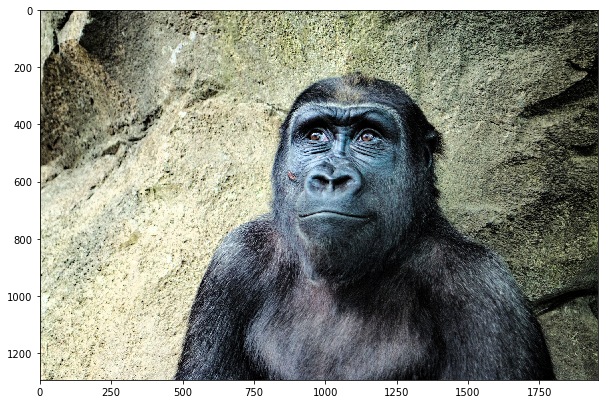

In [45]:
display_img(eq_color_gorilla)

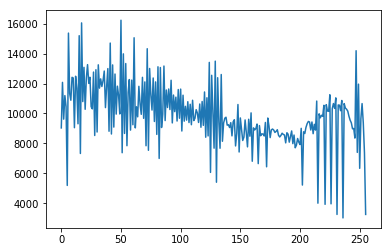

In [46]:
gor_his = cv2.calcHist([eq_color_gorilla],[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(gor_his)